**Problem Statement:**<br>
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Attribute Information:**

Input variables (based on physicochemical tests):
1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol<br>
**Output variable (based on sensory data):**
12.  - quality (score between 0 and 10)
<br>
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.<br>

You need to build a classification model. 

**Inspiration:**

Use machine learning to determine which physiochemical properties make a wine 'good'!



In [1]:
# IMporting necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Dataset
df=pd.read_csv('winequality-red.csv')
df1=df # Saving a copy of original dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.shape

(1599, 12)

- Dataset has 1599 rows and 12 columns
- There are 11 features and 'quality' is our target

In [5]:
# Checking for null values in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Dataset doesnt have null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- All the columns have numeric datatype.
- We donot have any catagorical data

In [7]:
# checking the different catagories in our target and their respective frequencies
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

- Target is imbalanced as there are very few observations for catagories '3', '4', and '8'

**Converting the target variable in two catagories as follows:**
- quality >= 7 => "good"/1
- quality < 7 => "bad"/0

In [8]:
df['quality']=df['quality'].replace((7,8),1)
df['quality']=df['quality'].replace((3,4,5,6),0)

In [9]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

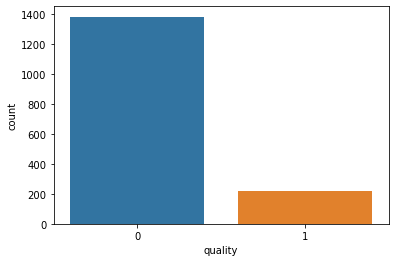

In [10]:
sns.countplot(df['quality'])

### Balancing dataset using SMOTE

In [11]:
#Seperating 'Features' and 'Target'

X=df.drop('quality',axis=1)
y=df['quality']

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smote=SMOTE(sampling_strategy='minority')

In [14]:
X_sm,y_sm=smote.fit_sample(X,y)

In [15]:
print(y_sm.value_counts())

1    1382
0    1382
Name: quality, dtype: int64


**Now, the dataset is balanced**

In [16]:
# Checking skewness:
X_sm.skew()

fixed acidity           0.709675
volatile acidity        0.947820
citric acid            -0.016205
residual sugar          4.009690
chlorides               6.257503
free sulfur dioxide     1.307963
total sulfur dioxide    2.134447
density                 0.127390
pH                      0.301171
sulphates               1.640557
alcohol                 0.235685
dtype: float64

considering the threshold as +/-1, following features are highly skewed:
- volatile acidity
- residual sugar 
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- sulphates 

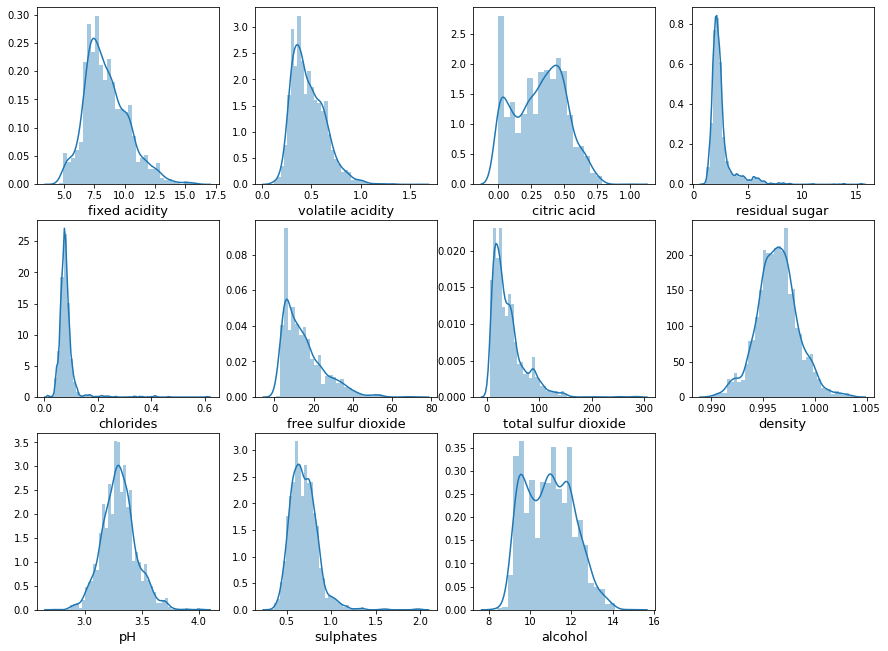

In [17]:
# Visualizing the distributions of features
plt.figure(figsize=(15,15))
plot_number=1
for i in X_sm:
    if plot_number<=15:
        ax=plt.subplot(4,4,plot_number)
        sns.distplot(X_sm[i])
        plt.xlabel(i,fontsize=13)
    plot_number+=1


In [18]:
X_sm['volatile acidity']=np.sqrt(X_sm['volatile acidity'])

In [19]:
X_sm['residual sugar']=np.sqrt(X_sm['residual sugar'])
X_sm['chlorides']=np.sqrt(X_sm['chlorides'])
X_sm['free sulfur dioxide']=np.sqrt(X_sm['free sulfur dioxide'])
X_sm['total sulfur dioxide']=np.sqrt(X_sm['total sulfur dioxide'])
X_sm['sulphates']=np.sqrt(X_sm['sulphates'])

In [20]:
X_sm.skew()

fixed acidity           0.709675
volatile acidity        0.429838
citric acid            -0.016205
residual sugar          2.531309
chlorides               3.567981
free sulfur dioxide     0.583194
total sulfur dioxide    0.908503
density                 0.127390
pH                      0.301171
sulphates               0.862147
alcohol                 0.235685
dtype: float64

- As the independent variables are actually the measured chemical properties of the wine, we cannot remove the outliers in this dataset. These extreme values of various properties may actually affect the quality of the wine. Hence deleting any extreme values / Outliers will be a loss of data which is undesirable.
- As we are not removing outliers, there will be skewness in some features even after transformation.
- Hence we will not use logistic regression model here, which assumes our data to be normally distributed.

### Feature Selection using SelectKBest:

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
selectbest=SelectKBest(score_func=chi2,k=11)
selectbest.fit(X_sm,y_sm)

SelectKBest(k=11, score_func=<function chi2 at 0x00000276EB78C670>)

In [23]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(X_sm.columns)

In [24]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores

,Features,Scores
0,fixed acidity,25.291838
1,volatile acidity,11.456620
2,citric acid,33.878186
3,residual sugar,1.004775
4,chlorides,1.185567
5,free sulfur dioxide,19.582481
6,total sulfur dioxide,137.251081
7,density,0.000631
8,pH,0.133415
9,sulphates,3.354769


In [25]:
print(feature_scores.nlargest(11,'Scores'))

                Features      Scores
6   total sulfur dioxide  137.251081
10               alcohol  115.239500
2            citric acid   33.878186
0          fixed acidity   25.291838
5    free sulfur dioxide   19.582481
1       volatile acidity   11.456620
9              sulphates    3.354769
4              chlorides    1.185567
3         residual sugar    1.004775
8                     pH    0.133415
7                density    0.000631


#### Based on the above analysis we can drop 'residual sugar', 'chlorides', 'pH', 'density, features as they have very low scores

In [26]:
X_best=X_sm.drop(['residual sugar', 'chlorides', 'pH', 'density'], axis=1)
X_best.shape

(2764, 7)

### Scaling the features

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
X_scaled=scaler.fit_transform(X_best)

### Now splitting the data in to training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_sm,test_size=0.25,random_state=42)

### Importing Classification Metrics

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

### Model 1: KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_knn=knn.predict(X_test)

In [35]:
knn.score(X_test,y_test)

0.8885672937771346

In [36]:
acc_knn=accuracy_score(y_test,y_knn)
acc_knn

0.8885672937771346

In [37]:
cvs_knn=cross_val_score(knn,X_scaled,y_sm,cv=7).mean()
cvs_knn

0.8733709071882947

In [38]:
roc_auc_score(y_test,y_knn)

0.8926766192547313

In [39]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       362
           1       0.82      0.98      0.89       329

    accuracy                           0.89       691
   macro avg       0.90      0.89      0.89       691
weighted avg       0.90      0.89      0.89       691



In [40]:
print(confusion_matrix(y_test,y_knn))

[[292  70]
 [  7 322]]


### Model 2: SVC

In [41]:
from sklearn.svm import SVC
svc=SVC()

In [42]:
svc.fit(X_train,y_train)

SVC()

In [43]:
y_svc=svc.predict(X_test)

In [44]:
svc.score(X_test,y_test)

0.8769898697539797

In [45]:
acc_svc=accuracy_score(y_test,y_svc)
acc_svc

0.8769898697539797

In [46]:
cvs_svc=cross_val_score(svc,X_scaled,y_sm,cv=7).mean()
cvs_svc

0.8643320696523806

In [47]:
roc_auc_score(y_test,y_svc)

0.8789946094812676

In [48]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       362
           1       0.84      0.92      0.88       329

    accuracy                           0.88       691
   macro avg       0.88      0.88      0.88       691
weighted avg       0.88      0.88      0.88       691



### Model 3: Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [50]:
dtc.fit(X_train,y_train)
y_dtc=dtc.predict(X_test)

In [51]:
dtc.score(X_test,y_test)

0.8958031837916064

In [52]:
acc_dtc=accuracy_score(y_test,y_dtc)
acc_dtc

0.8958031837916064

In [53]:
cvs_dtc=cross_val_score(dtc,X_scaled,y_sm,cv=7).mean()
cvs_dtc

0.874453144362545

In [54]:
roc_auc_score(y_test,y_dtc)

0.8961191623704848

In [55]:
print(classification_report(y_test,y_dtc))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       362
           1       0.88      0.90      0.89       329

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691



In [56]:
print(confusion_matrix(y_test,y_dtc))

[[322  40]
 [ 32 297]]


### Model 4: Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [58]:
gbc.fit(X_train,y_train)
y_gbc=gbc.predict(X_test)

In [59]:
gbc.score(X_test,y_test)

0.8986975397973951

In [60]:
acc_gbc=accuracy_score(y_test,y_gbc)
acc_gbc

0.8986975397973951

In [61]:
cvs_gbc=cross_val_score(gbc,X_scaled,y_sm,cv=7).mean()
cvs_gbc

0.8784369521116935

In [62]:
roc_auc_score(y_test,y_gbc)

0.9002670070026365

In [63]:
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       362
           1       0.86      0.93      0.90       329

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691



In [64]:
print(confusion_matrix(y_test,y_gbc))

[[314  48]
 [ 22 307]]


## Model 5: Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier()

In [67]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_rf=rf.predict(X_test)

In [69]:
acc_rf=accuracy_score(y_test,y_rf)
acc_rf

0.9247467438494935

In [70]:
cvs_rf=cross_val_score(rf,X,y,cv=7).mean()
cvs_rf

0.874306399185737

In [71]:
roc_auc_score(y_test,y_rf)

0.9262372164100154

In [72]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       362
           1       0.89      0.96      0.92       329

    accuracy                           0.92       691
   macro avg       0.93      0.93      0.92       691
weighted avg       0.93      0.92      0.92       691



In [73]:
print(confusion_matrix(y_test,y_rf))

[[324  38]
 [ 14 315]]


### ROC_AUC Curve

In [74]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

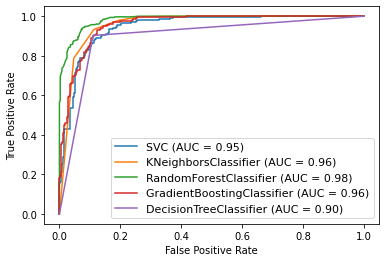

In [75]:
disp=plot_roc_curve(svc,X_test,y_test)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

In [76]:
print('cross_val_score_knn',cvs_knn)
print('cross_val_score_gbc',cvs_gbc)
print('cross_val_score_rf',cvs_rf)

cross_val_score_knn 0.8733709071882947
cross_val_score_gbc 0.8784369521116935
cross_val_score_rf 0.874306399185737


**Based on AOC and Cross Validation Score we can conclude that 'Random Forest Classifier' is our best model.**

## Tuning the Hyperparameter for random forest model

In [77]:
from sklearn.model_selection import GridSearchCV

In [87]:
params={'n_estimators':[50,80,100,120],
        'criterion':['entropy','gini'],
        'max_depth':[4,8,10,None,12],
        'min_samples_split':[2,4,5,6,10],
        'min_samples_leaf':[1,2,3,4,5]}

In [88]:
gridsearch=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [89]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 8, 10, None, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6, 10],
                         'n_estimators': [50, 80, 100, 120]})

In [90]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [91]:
rf_best=RandomForestClassifier(criterion='gini',max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=120)

In [92]:
rf_best.fit(X_train,y_train)
y_rfBest=rf_best.predict(X_test)

In [93]:
cross_val_score(rf_best,X,y,cv=7).mean()

0.8811904214685183

In [94]:
print(classification_report(y_test,y_rfBest))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       362
           1       0.89      0.96      0.93       329

    accuracy                           0.93       691
   macro avg       0.93      0.93      0.93       691
weighted avg       0.93      0.93      0.93       691



In [95]:
print(confusion_matrix(y_test,y_rfBest))

[[325  37]
 [ 14 315]]


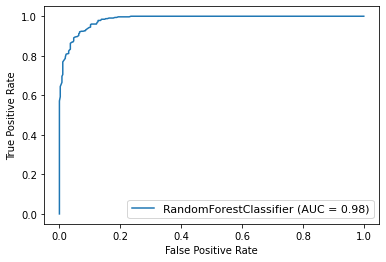

In [96]:
## Printing roc_auc curve for our best model
disp=plot_roc_curve(rf_best,X_test,y_test)
plt.legend(prop={'size':11},loc='lower right')

### Saving our best model

In [97]:
import pickle
filename='RedWine_RF.pkl'
pickle.dump(rf_best,open(filename,'wb'))